# BUILDING THE TRAINED MODEL

DATA PREPROCESSING

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('../dataset/train_dataset.csv', index_col = 0)

In [3]:
dataset.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.0,1
251,TRANSFER,2806.00,2806.0,0.0,0.0,0.0,1
252,CASH_OUT,2806.00,2806.0,0.0,26202.0,0.0,1
320,PAYMENT,14420.66,0.0,0.0,0.0,0.0,0


In [3]:
import numpy as np

In [5]:
dataset.shape

(16426, 7)

In [6]:
x = dataset.iloc[ : , : 6].values
y = dataset.iloc[ : , 6].values

In [7]:
x.shape

(16426, 6)

In [8]:
y


array([1, 1, 1, ..., 1, 1, 1], shape=(16426,))

In [5]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [11]:
x_train.shape

(13962, 6)

In [12]:
x_test.shape

(2464, 6)

In [13]:
fraud = np.count_nonzero(y_train == 1)
valid = np.count_nonzero(y_train == 0)

In [14]:
print('Fraud cases in training data =', fraud)
print('Valid cases in training data =', valid)

Fraud cases in training data = 6961
Valid cases in training data = 7001


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
categorical_cols = ['type']  # Add other categorical columns if needed

for col in categorical_cols:
    if col in dataset.columns:
        le = LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col].astype(str))
        label_encoders[col] = le

# Now extract features and target
x = dataset.iloc[:, :6].values
y = dataset.iloc[:, 6].values

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# NOW scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train[ : 5]

array([[ 1.27763465, -0.31357738, -0.30582338, -0.20675651, -0.28490543,
        -0.36966534],
       [ 1.27763465, -0.32802919, -0.31409425, -0.20675651, -0.28490543,
        -0.36966534],
       [ 1.27763465, -0.15415044, -0.37841339, -0.20675651,  0.77553736,
         0.70115254],
       [ 1.27763465, -0.40416175, -0.35766548, -0.20675651, -0.28490543,
        -0.36966534],
       [-1.42023815, -0.355535  ,  1.12504762,  1.80319217, -0.04407677,
        -0.20848876]])

In [19]:
x_test[ : 5]

array([[ 1.27763465, -0.30316218, -0.34279611, -0.20675651, -0.21216671,
        -0.23186444],
       [-0.74576995,  0.86647036,  0.36952663, -0.20675651, -0.26980838,
         0.35837169],
       [-0.74576995,  0.10717767, -0.06502217, -0.20675651,  1.24115594,
         1.31030661],
       [ 1.27763465,  0.35481449,  0.07670221, -0.20675651, -0.28490543,
        -0.36966534],
       [ 0.60316645, -0.42992051, -0.3680821 , -0.20115508, -0.28490543,
        -0.36966534]])

LOGISTIC REGRESSION (LR)

In [8]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
y_pred = LR_model.predict(x_test)

In [7]:
from sklearn.metrics import accuracy_score

In [10]:
acc_lr = accuracy_score(y_test, y_pred)

In [24]:
print(acc_lr)

0.8794642857142857


K-NEAREST NEIGHBORS (KNN)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
y_pred = KNN_model.predict(x_test)

In [13]:
acc_knn = accuracy_score(y_test, y_pred)

In [28]:
print(acc_knn)

0.9646915584415584


SUPPORT VECTOR MACHINE (SVM)

In [14]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
y_pred = SVM_model.predict(x_test)

In [16]:
acc_svm = accuracy_score(y_test, y_pred)

In [33]:
print(acc_svm)

0.875


NAIVE BAYES (NB)

In [17]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [18]:
y_pred = NB_model.predict(x_test)

In [19]:
acc_nb = accuracy_score(y_test, y_pred)

In [37]:
print(acc_nb)

0.7938311688311688


DECISION TREE (DT)

In [20]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred = DT_model.predict(x_test)

In [22]:
acc_dt = accuracy_score(y_test, y_pred)

In [41]:
print(acc_dt)

0.9943181818181818


RANDOM FOREST (RF)

In [23]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = RF_model.predict(x_test)

In [25]:
acc_rf = accuracy_score(y_test, y_pred)

In [45]:
print(acc_rf)

0.9951298701298701


SAVING THE BEST TRAINED MODEL (RANDOM FOREST)

ACCURACY COMPARISON OF ALL THE MODELS

In [26]:
scores = [acc_lr * 100,
          acc_knn * 100,
          acc_svm * 100,
          acc_nb * 100,
          acc_dt * 100,
          acc_rf * 100]

In [27]:
names = ["Logistic Regression",
        "K-Nearest Neighbors",
        "Support Vector Machine",
        "Naive Bayes",
        "Decision Tree",
        "Random Forest"]

In [28]:
df = pd.DataFrame()
df['Algorithm Name'] = names
df['Accuracy Score (%)'] = scores
df = df.sort_values('Accuracy Score (%)', ascending = False)

In [29]:
df

,Algorithm Name,Accuracy Score (%)
5,Random Forest,99.472403
4,Decision Tree,99.431818
1,K-Nearest Neighbors,96.469156
0,Logistic Regression,87.946429
2,Support Vector Machine,87.500000
3,Naive Bayes,79.383117


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

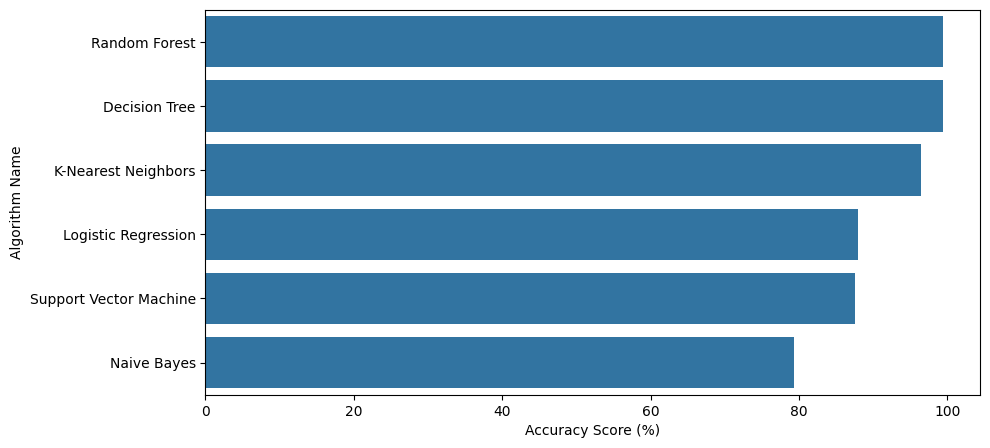

In [31]:
fig = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = "Accuracy Score (%)", y = "Algorithm Name", data = df)

SAVING THE BEST TRAINED MODEL

In [32]:
import os.path

In [33]:
import joblib

# Save Random Forest model (best performing model)
model_path = './model/random_forest_model.joblib'
if os.path.isfile(model_path) is False:
    joblib.dump(RF_model, model_path)
    print(f"✓ Random Forest model saved to: {model_path}")
else:
    print(f"Model already exists at: {model_path}")

# Save the scaler (needed for predictions on new data)
scaler_path = './model/scaler.joblib'
joblib.dump(scaler, scaler_path)
print(f"✓ Scaler saved to: {scaler_path}")

✓ Random Forest model saved to: ./model/random_forest_model.joblib
✓ Scaler saved to: ./model/scaler.joblib


In [ ]:
# Test loading and verify the saved model
loaded_model = joblib.load('./model/random_forest_model.joblib')
loaded_scaler = joblib.load('./model/scaler.joblib')

# Verify on test data
y_pred_test = loaded_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("="*50)
print("MODEL VERIFICATION")
print("="*50)
print(f"✓ Model loaded successfully!")
print(f"✓ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✓ Model is ready for deployment!")